In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# pip install tensorflow


In [3]:
import tensorflow as tf

In [4]:
from tensorflow import keras


In [5]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [6]:
len(x_train)

60000

In [7]:
len(x_test)

10000

In [8]:
x_train.shape


(60000, 28, 28)

In [9]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
x_test.shape

(10000, 28, 28)

# Now x_train is in 2d form we have to flatten it and convert to 1d form

The reshape from pandas will take 2 parameters one is whole dataset size and ie 6000 and 28,28 should be coveted to 1d so 28*28

In [12]:
x_train_flattened =x_train.reshape(len(x_train),28*28)
x_test_flattened=x_test.reshape(len(x_test),28*28)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_flattened=scaler.fit_transform(x_train_flattened)
x_test_flattenedx_test_flattened=scaler.fit_transform(x_test_flattened)

In [13]:
x_train_flattened.shape

(60000, 784)

In [14]:
x_test_flattened.shape

(10000, 784)

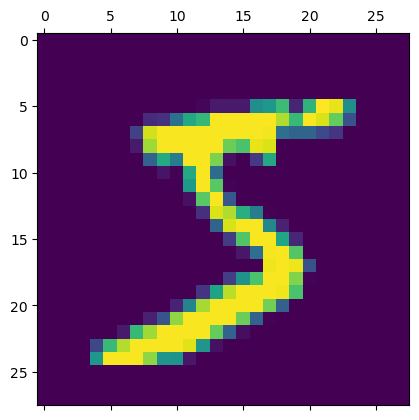

In [15]:
plt.matshow(x_train[0])

In [16]:
#keras.sequential is used to create neural network layer 
#a layer is called dense  one neuron in one  layer   will be connected to multiple neurons in other layer


In [17]:
model =keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')#this will take 3 parameters 1)output bcz output will be from 1-10
    # 2) input shape(ie size of a perticular image),and the activation function which is sigmoid which will classify them   
])
#optimisers are used to train optimally when the traning and backpropagation is going on
#loss is the error and the param scc ,accuracy is my main target
#eppoches are how many iterations we will be training
model.compile( 
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics= ['accuracy']
)
model.fit(x_train_flattened,y_train,epochs=5)

C:\Users\proshan\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8347 - loss: 0.5806
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9174 - loss: 0.3228
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9256 - loss: 0.2942
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9261 - loss: 0.2846
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9273 - loss: 0.2676


In [18]:
%matplotlib inline

In [19]:
model.evaluate(x_test_flattened,y_test)#evaluating if it works on test data as well or not


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8386 - loss: 37.3570


[34.59231185913086, 0.8547999858856201]

In [20]:
y_pred=model.predict(x_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [21]:
y_pred

array([[1.000000e+00, 0.000000e+00, 0.000000e+00, ..., 1.000000e+00,
        1.000000e+00, 1.000000e+00],
       [1.000000e+00, 0.000000e+00, 1.000000e+00, ..., 0.000000e+00,
        1.000000e+00, 0.000000e+00],
       [0.000000e+00, 1.000000e+00, 1.000000e+00, ..., 2.923361e-07,
        1.000000e+00, 0.000000e+00],
       ...,
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 1.000000e+00,
        1.000000e+00, 1.000000e+00],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        1.000000e+00, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 1.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00]], dtype=float32)

In [22]:
y_pred[2]

array([0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 2.6973325e-16, 2.9233610e-07,
       1.0000000e+00, 0.0000000e+00], dtype=float32)

Now i have to choose max value amoung this and that will be my ans for that i have to use argmax ,which is a numpy function whichh will return the index of the max element

In [23]:
np.argmax(y_pred[2])

1

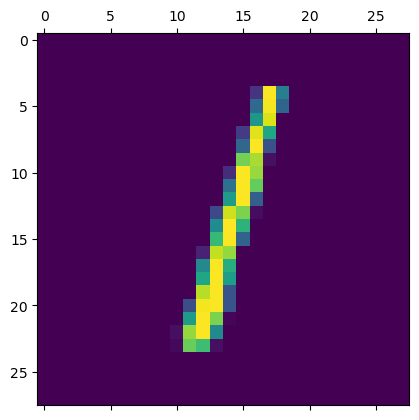

In [24]:
plt.matshow(x_test[2])

# Confusion Matrix

In [25]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [26]:
y_pred

array([[1.000000e+00, 0.000000e+00, 0.000000e+00, ..., 1.000000e+00,
        1.000000e+00, 1.000000e+00],
       [1.000000e+00, 0.000000e+00, 1.000000e+00, ..., 0.000000e+00,
        1.000000e+00, 0.000000e+00],
       [0.000000e+00, 1.000000e+00, 1.000000e+00, ..., 2.923361e-07,
        1.000000e+00, 0.000000e+00],
       ...,
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 1.000000e+00,
        1.000000e+00, 1.000000e+00],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        1.000000e+00, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 1.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00]], dtype=float32)

Now we can see that y_pred and y_test are not in the same form beacause we have not calculated argmax for it

In [29]:
y_pred_labels=[np.argmax(i) for i in y_pred]

In [34]:
y_pred_labels[:5]

[0, 0, 1, 0, 4]

In [35]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [37]:
cm= tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels
)

In [38]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 975,    1,    1,    1,    2,    0,    0,    0,    0,    0],
       [   5, 1129,    1,    0,    0,    0,    0,    0,    0,    0],
       [ 156,  306,  554,    3,   12,    0,    0,    0,    1,    0],
       [  61,  120,  286,  542,    0,    1,    0,    0,    0,    0],
       [  12,   43,   72,   95,  759,    0,    0,    0,    1,    0],
       [ 206,   33,   83,  402,   60,  101,    3,    1,    3,    0],
       [ 143,   77,  617,   18,   63,   10,   30,    0,    0,    0],
       [ 155,  130,  139,  364,  134,    1,    0,  105,    0,    0],
       [  50,  144,  347,  278,   37,   18,   20,    8,   72,    0],
       [  34,   57,   41,  364,  504,    0,    0,    8,    1,    0]])>

Lets make it look good

Text(95.72222222222221, 0.5, 'Truth')

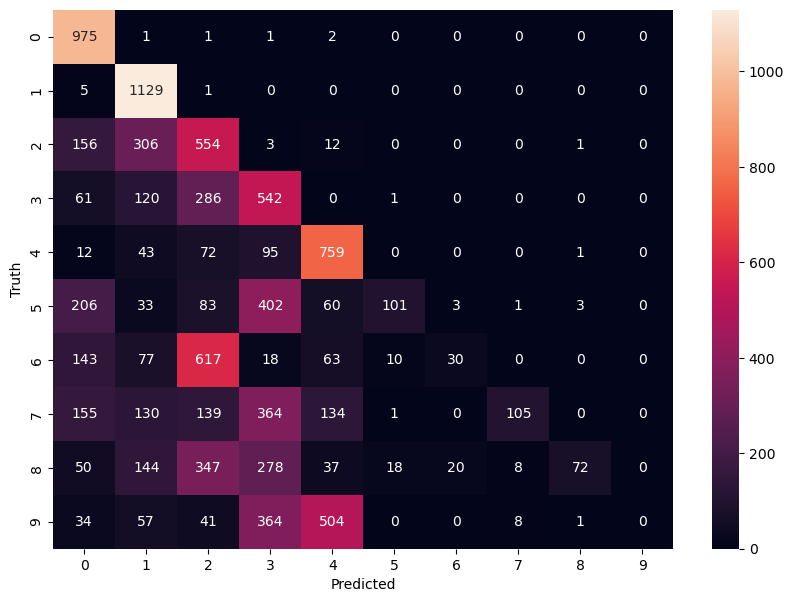

In [39]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Now the diagonal indicates the right prediction and others indicated that ex- in 2nd row 1st col-5 , indicating that 5 times our model predicted 0 but the truth was 1

# Adding a hidden layer

In [40]:
model =keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')# the first layer is hidden layer and 2nd is output layer 
    #hidden layer has 100 nuerons its just an estimation
    #hidden layer will take input and sencond will take input from hidden layer
    
    
])

model.compile( 
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics= ['accuracy']
)
model.fit(x_train_flattened,y_train,epochs=5)

C:\Users\proshan\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8846 - loss: 0.3988
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9687 - loss: 0.1078
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9789 - loss: 0.0694
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9844 - loss: 0.0520
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9884 - loss: 0.0386


In [41]:
model.evaluate(x_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8865 - loss: 33.6455


[28.344745635986328, 0.9031999707221985]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

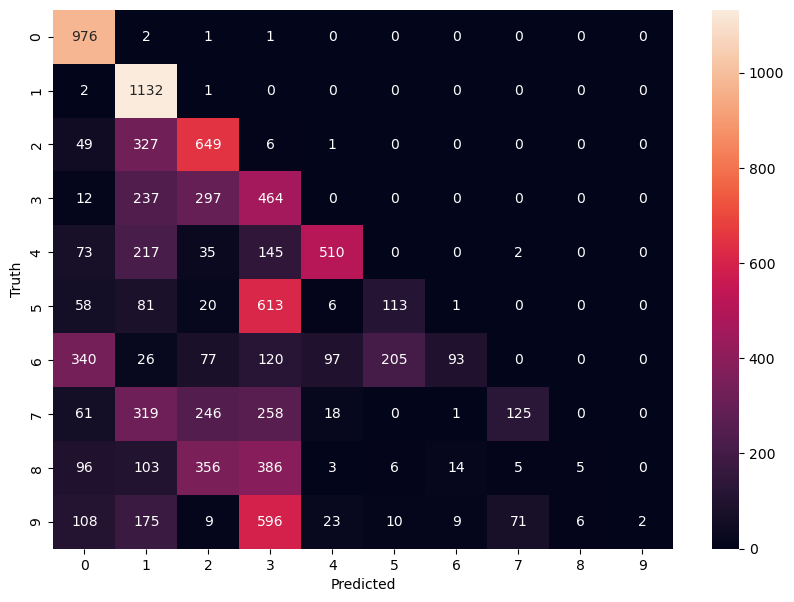

In [44]:
y_pred=model.predict(x_test_flattened)
y_pred_labels=[np.argmax(i) for i in y_pred]
cm= tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels
)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Conclusion-
     we can see that the accuracy has increased and the numbers in the confusion matrix have been decreased using the hidden layer